<a href="https://colab.research.google.com/github/DevanshD3/Clustering-Algorithms/blob/main/OPTICS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.datasets import load_files
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import OPTICS
import numpy as np
from numpy import unique,where


In [ ]:

# for reproducibility
random_state = 0 

DATA_DIR = "/content/drive/MyDrive/Data/CV.csv"
df = pd.read_csv(DATA_DIR, low_memory= False)
df.head()

,Author ID,Modified Description,ID
0,27348,Simple latch with two cross-coupled NOR gates.,137750
1,47272,Laboratorio. Sesión 3.FUNDAMENTOS DE COMPUTADORES,229813
2,36805,This is a 7 segment display.,249268
3,36489,Este bloque les servirá para el examen parcial,232819
4,30771,The external clock is directly connected to al...,249264


In [ ]:
vec = TfidfVectorizer(stop_words='english')
df['Modified Description'] = df['Modified Description'].fillna('')
vec_matrix = vec.fit_transform(df['Modified Description'])
features = vec.transform(df['Modified Description'])


In [ ]:
# reduce the features to 2D
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(features.toarray())


In [ ]:
epsilon = 0.5
min_samples = 22
cluster_method = 'xi'
metric = 'minkowski'

In [ ]:
# Compute OPTICS
db = OPTICS(max_eps=epsilon, min_samples=min_samples, cluster_method=cluster_method, metric=metric).fit(reduced_features)
labels = db.labels_

no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 24
Estimated no. of noise points: 4753


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_optics.py:802: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


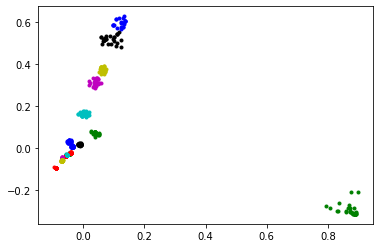

In [ ]:
# Generate scatter plot for training data
import matplotlib.pyplot as plt
from itertools import cycle
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(no_clusters), colors):
    my_members = labels == k
    # cluster_center = cluster_centers[k]
    plt.plot(reduced_features[my_members, 0], reduced_features[my_members, 1], col + '.')
    # plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
    #          markeredgecolor='k', markersize=8)
# plt.scatter(reduced_features[:,0], reduced_features[:,1], c=colors, marker="o", picker=True)
# plt.title(f'OPTICS clustering')
# plt.xlabel('Axis X[0]')
# plt.ylabel('Axis X[1]')
plt.show()

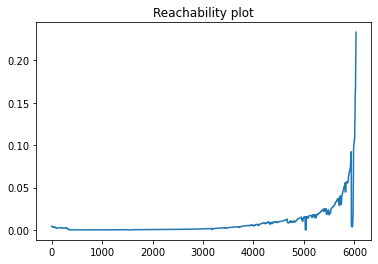

In [ ]:
# Generate reachability plot
reachability = db.reachability_[db.ordering_]
plt.plot(reachability)
plt.title('Reachability plot')
plt.show()